# Spatial Variability in Surface Temperature

---

## Snoqualmie - IR thermometers
Snoqualmie has two $T_s$ sensors, pointed at different patches of snow.
Questions:
    1. How much does $T_s$ vary between the two sensors?
    2. Are there particular conditions that co-occurr with spatial variability in $T_s$? 

In [1]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
import kray
# OS interaction
import sys, pickle, os
# import subplots function for plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph
import matplotlib.gridspec as gridspec


# --------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dirPre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dirPre = '/Users/karllapo/gdrive/'
# Project directory
dirProj = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/'
# Directory for printing figures
dirPrint = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/Graphics'
# Processed data directory
dirData = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ'

# --------------------------------------------------------------------------------------------
# Global formatting
sns.set_context('poster')
sns.set_style('whitegrid')
# must insert this statement to render the plots within the notebook
%matplotlib inline

In [2]:
## Read the formatted supporting snoqualmie obs
os.chdir(dirData)
support = xr.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')

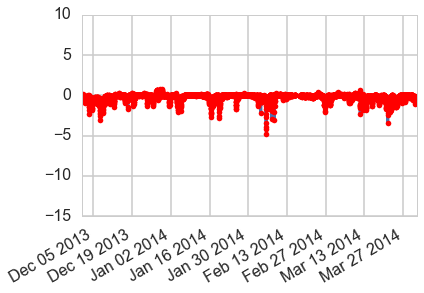

In [3]:
fig, ax = plt.subplots(1, 1)
ax.plot(support.time, support.Tsrf_1-support.Tsrf_2)
ax.plot(support.where(support.SP==1).time, (support.Tsrf_1-support.Tsrf_2).where(support.SP==1), 'r.')
ax.set_xlim(datetime(2013,12,1), datetime(2014,4,1))
fig.autofmt_xdate()

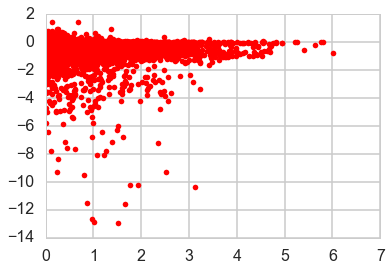

In [4]:
fig, ax = plt.subplots(1, 1)
ax.plot(support.where(support.SP==1).WIND, (support.Tsrf_1-support.Tsrf_2).where(support.SP==1), 'r.')

<xarray.DataArray ()>
array(0.42023360357137357)


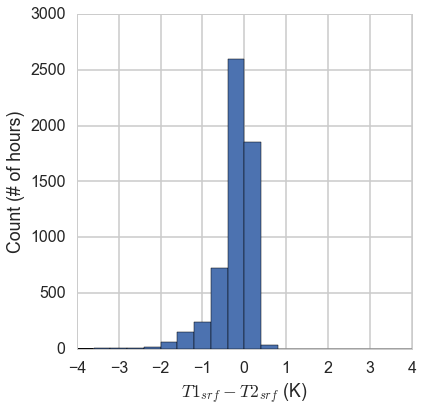

In [14]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.hist((support.Tsrf_1-support.Tsrf_2).where(support.SP==1).\
         loc[dict(time=slice(datetime(2013,12,1), datetime(2014,4,1)))],
         range=(-4,4), bins=20)
ax.set_ylabel('Count (# of hours)')
ax.set_xlabel('$T1_{srf} - T2_{srf}$ (K)')

print((support.Tsrf_1-support.Tsrf_2).where(support.SP==1).\
         loc[dict(time=slice(datetime(2013,12,1), datetime(2014,4,1)))].std(dim='time'))

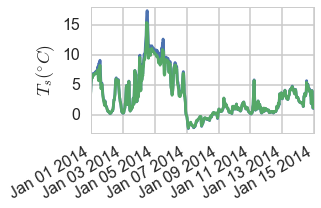

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(4,2.5))
ax.plot(support.time, support.T6 - support.Tsrf_1)
ax.plot(support.time, support.T6 - support.Tsrf_2)
ax.set_xlim(datetime(2014,1,1), datetime(2014,1,15))
ax.set_ylabel('$T_s (^{\circ}C)$')
ax.set_ylim(-3,18)
fig.autofmt_xdate()

In [13]:
support.sel(time=datetime(2014,12,29,12,0,0))

<xarray.Dataset>
Dimensions:       ()
Coordinates:
    time          datetime64[ns] 2014-12-29T12:00:00
Data variables:
    JulianDay     int64 363
    T4            float64 -1.329
    RH4           float64 76.28
    Precip        float64 0.0
    SurfPres      float64 1.027e+03
    WIND          float64 1.31
    Snowdepth_24  float64 0.000635
    Snowdepth     float64 0.5072
    Lysimeter     float64 0.0
    SW_down_avg   float64 nan
    SW_up_avg     float64 170.5
    LW_down_avg   float64 nan
    LW_up_avg     float64 297.2
    Albedo        float64 nan
    Tsrf_1        float64 nan
    T6            float64 -3.085
    Vap_press_6   float64 0.373
    RH6           float64 76.59
    T3            float64 -3.214
    CSAT Height   float64 2.2
    CSAT Azimuth  float64 55.0
    GheatfluxAvg  float64 -7.882
    SurGflux      float64 -11.19
    Tsrf_2        float64 nan
    SensFlux      float64 0.749
    LatFlux       float64 16.45
    Tsrf          float64 nan
    groundTs      float64 n